**A. Penyiapan Library dan Dataset**

In [1]:
# import package/library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, string # pre-processing teks
from sklearn.feature_extraction.text import TfidfVectorizer # bag of words
from sklearn.naive_bayes import MultinomialNB # untuk pembangunan model
from sklearn.metrics import classification_report, f1_score, accuracy_score,confusion_matrix

In [2]:
# import data dari google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df_train = pd.read_csv('/content/drive/MyDrive/kuliah/Information Retrieval/dataset_prepro.csv', encoding='latin-1')
print(df_train)

Mounted at /content/drive
      Unnamed: 0                             id_review  \
0              0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1              1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2              2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3              5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4              6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   
...          ...                                   ...   
1709        2021  ChdDSUhNMG9nS0VJQ0FnSURxXzYzMzl3RRAB   
1710        2022  ChdDSUhNMG9nS0VJQ0FnSURxa0pfdnBBRRAB   
1711        2023  ChdDSUhNMG9nS0VJQ0FnSURzOHBhcDdnRRAB   
1712        2024  ChdDSUhNMG9nS0VJQ0FnSURzc0xuMGp3RRAB   
1713        2025  ChdDSUhNMG9nS0VJQ0FnSURzck5XR253RRAB   

                                 attractions_clean_text  \
0                                                  none   
1     lari tonton matahari terbit indah jalan inna g...   
2     lokasi pas liat sunrise jam santai bayar parki...   
3     tempat bagus ramai unjung salah pan

**B. Analisis Data Eksploratif**

Jumlah Review Tiap Aspek untuk Tiap Sentimen

In [5]:
import pandas as pd

# menghitung jumlah review tiap aspek tanpa "none"
attractions_counts = df_train[df_train['attractions'] != 0]['attractions'].value_counts()
amenities_counts = df_train[df_train['amenities'] != 0]['amenities'].value_counts()
access_counts = df_train[df_train['access'] != 0]['access'].value_counts()
price_counts = df_train[df_train['price'] != 0]['price'].value_counts()
no_aspect_counts = df_train[df_train['no_aspect'] != 0]['no_aspect'].value_counts()

# menghitung jumlah review tiap aspek untuk tiap sentimen
attractions_df = pd.DataFrame({'Aspect': 'Attractions', 'Sentiment': attractions_counts.index, 'Count': attractions_counts.values})
amenities_df = pd.DataFrame({'Aspect': 'Amenities', 'Sentiment': amenities_counts.index, 'Count': amenities_counts.values})
access_df = pd.DataFrame({'Aspect': 'Access', 'Sentiment': access_counts.index, 'Count': access_counts.values})
price_df = pd.DataFrame({'Aspect': 'Price', 'Sentiment': price_counts.index, 'Count': price_counts.values})
no_aspect_df = pd.DataFrame({'Aspect': 'No Aspect', 'Sentiment': no_aspect_counts.index, 'Count': no_aspect_counts.values})

# menggabungkan hasil
combined_df = pd.concat([attractions_df, amenities_df, access_df, price_df, no_aspect_df], ignore_index=True)

# tampil output
print("Total Jumlah Review Tiap Aspek untuk Tiap Sentimen")
display(combined_df)

Jumlah Review Tiap Aspek untuk Tiap Sentimen


Aspect  Sentiment  Count
0   Attractions          3   1244
1   Attractions          1    170
2   Attractions          2     24
3     Amenities          3    373
4     Amenities          1     36
5     Amenities          2     28
6        Access          3     74
7        Access          2     18
8        Access          1     13
9         Price          3    107
10        Price          1     12
11        Price          2     11
12    No Aspect          2    188
13    No Aspect          3    161
14    No Aspect          1     27

Total Jumlah Review Tiap Aspek


Aspek  Total Jumlah Review
0  Attractions                 1438
1    Amenities                  437
2       Access                  105
3        Price                  130
4    No Aspect                  376

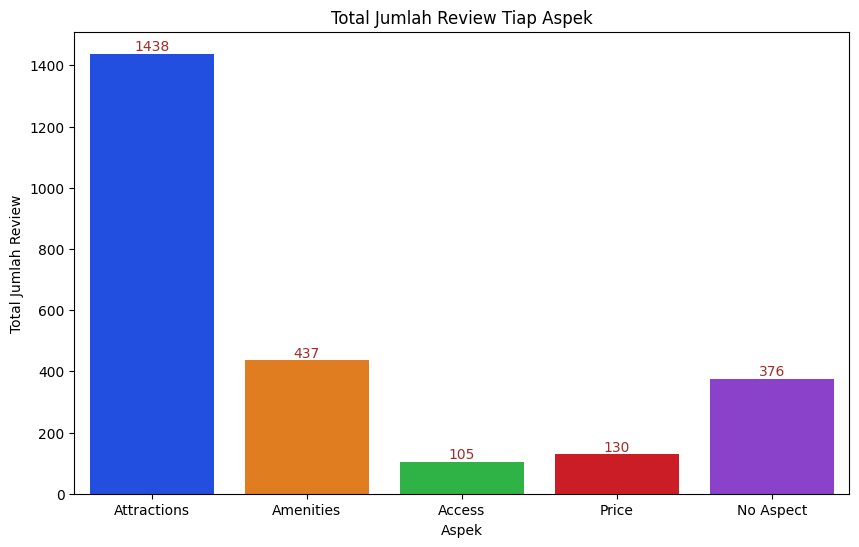

In [17]:
# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# data jumlah review tiap aspek tanpa "none"
attractions_counts = df_train[df_train['attractions'] != 0]['attractions'].value_counts()
amenities_counts = df_train[df_train['amenities'] != 0]['amenities'].value_counts()
access_counts = df_train[df_train['access'] != 0]['access'].value_counts()
price_counts = df_train[df_train['price'] != 0]['price'].value_counts()
no_aspect_counts = df_train[df_train['no_aspect'] != 0]['no_aspect'].value_counts()

# membuat dataset
data = {
    'Aspek': ['Attractions', 'Amenities', 'Access', 'Price', 'No Aspect'],
    'Total Jumlah Review': [
        attractions_counts.sum(),
        amenities_counts.sum(),
        access_counts.sum(),
        price_counts.sum(),
        no_aspect_counts.sum()
    ]
}

# membuat data frame
df_total_review = pd.DataFrame(data)
print("Total Jumlah Review Tiap Aspek")
display(df_total_review)

# membuat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Aspek', y='Total Jumlah Review', data=df_total_review, palette='bright')
plt.title('Total Jumlah Review Tiap Aspek')
plt.xlabel('Aspek')
plt.ylabel('Total Jumlah Review')

# Annotating each bar with its count with some padding
for index, value in enumerate(df_total_review['Total Jumlah Review']):
    barplot.text(index, value + 0.1, str(value), color='brown', ha="center", va="bottom")

# Showing the plot
plt.show()

Proporsi Sentimen Tiap Aspek

Aspek Attractions

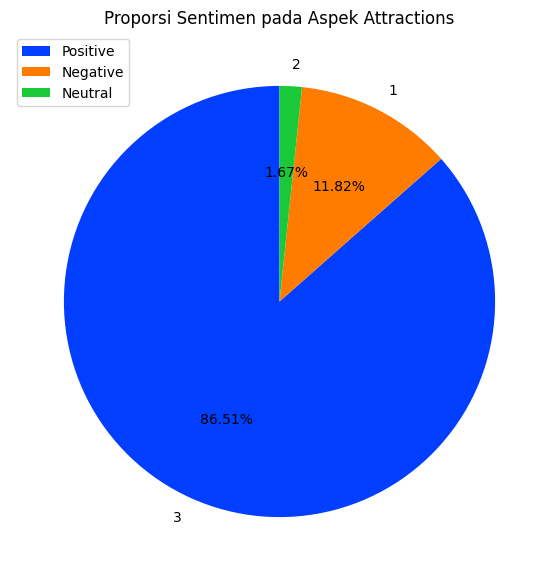

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# jumlah tiap sentimen
sentiment_counts = df_train['attractions'].value_counts()
sentiment_counts = sentiment_counts.drop(0)

# pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('bright')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

# legenda
plt.legend(['Positive', 'Negative', 'Neutral'], loc='upper left')
plt.title('Proporsi Sentimen pada Aspek Attractions')

# tampilkan plot
plt.show()

Aspek Amenities

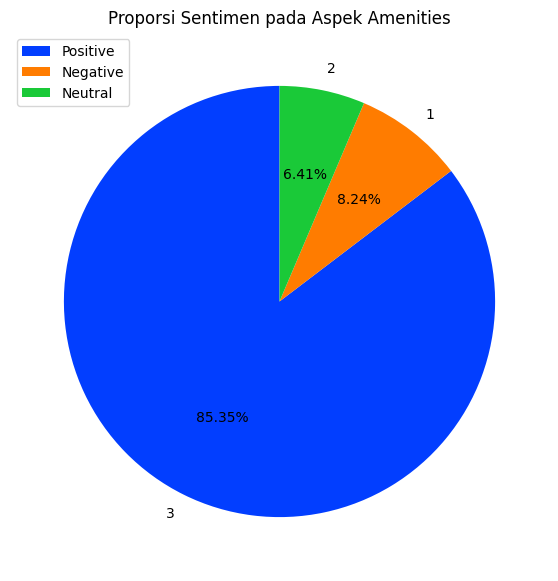

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# jumlah tiap sentimen
sentiment_counts = df_train['amenities'].value_counts()
sentiment_counts = sentiment_counts.drop(0)

# pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('bright')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

# legenda
plt.legend(['Positive', 'Negative', 'Neutral'], loc='upper left')
plt.title('Proporsi Sentimen pada Aspek Amenities')

# tampilkan plot
plt.show()

Aspek Access

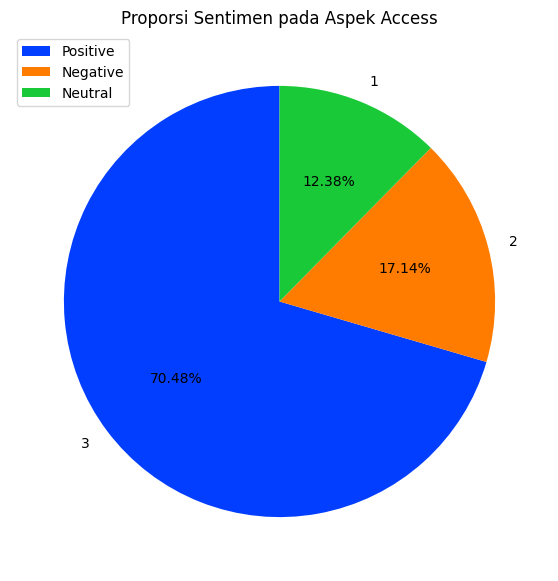

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# jumlah tiap sentimen
sentiment_counts = df_train['access'].value_counts()
sentiment_counts = sentiment_counts.drop(0)

# pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('bright')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

# legenda
plt.legend(['Positive', 'Negative', 'Neutral'], loc='upper left')
plt.title('Proporsi Sentimen pada Aspek Access')

# tampilkan plot
plt.show()

ASPEK PRICE

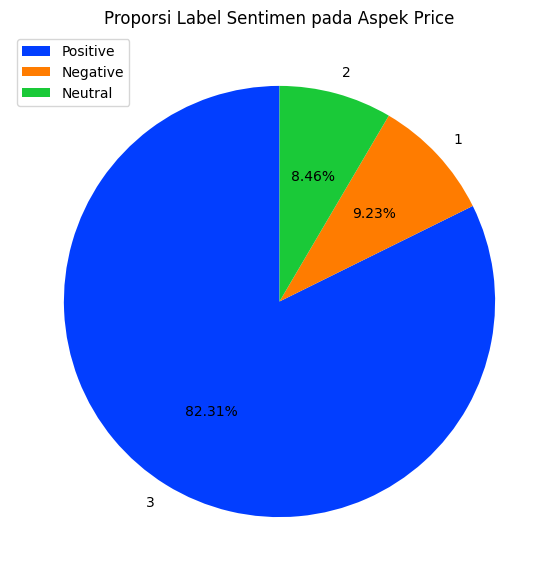

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# jumlah tiap sentimen
sentiment_counts = df_train['price'].value_counts()
sentiment_counts = sentiment_counts.drop(0)

# pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('bright')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

# legenda
plt.legend(['Positive', 'Negative', 'Neutral'], loc='upper left')
plt.title('Proporsi Label Sentimen pada Aspek Price')

# tampilkan plot
plt.show()

No Aspect

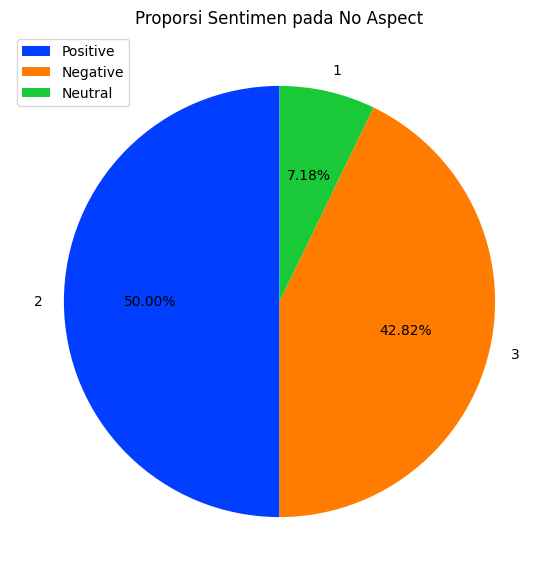

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# jumlah tiap sentimen
sentiment_counts = df_train['no_aspect'].value_counts()
sentiment_counts = sentiment_counts.drop(0)

# pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('bright')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

# legenda
plt.legend(['Positive', 'Negative', 'Neutral'], loc='upper left')
plt.title('Proporsi Sentimen pada No Aspect')

# tampilkan plot
plt.show()

Rata-Rata Jumlah Kata dan Kata Unik Tiap Aspek untuk Tiap Sentimen

In [27]:
import pandas as pd

# fungsi untuk menghitung rata-rata jumlah kata dan kata unik
def calculate_word_counts(df, aspect_column):
    df['word_count'] = df[aspect_column].apply(lambda x: len(str(x).split())) # menghitung jumlah kata
    df['unique_word_count'] = df[aspect_column].apply(lambda x: len(set(str(x).split()))) # menghitung jumlah kata unik

    positive_word_count_mean = df[df['attractions'] == 3]['word_count'].mean()
    negative_word_count_mean = df[df['attractions'] == 2]['word_count'].mean()
    neutral_word_count_mean = df[df['attractions'] == 1]['word_count'].mean()
    none_word_count_mean = df[df['attractions'] == 0]['word_count'].mean()

    positive_unique_word_count_mean = df[df['attractions'] == 1]['unique_word_count'].mean()
    negative_unique_word_count_mean = df[df['attractions'] == 2]['unique_word_count'].mean()
    neutral_unique_word_count_mean = df[df['attractions'] == 3]['unique_word_count'].mean()
    none_unique_word_count_mean = df[df['attractions'] == 0]['unique_word_count'].mean()

    return {
        'Aspect': aspect_column,
        'Positive_Word_Count_Mean': positive_word_count_mean,
        'Negative_Word_Count_Mean': negative_word_count_mean,
        'Neutral_Word_Count_Mean': neutral_word_count_mean,
        'None_Word_Count_Mean': none_word_count_mean,
        'Positive_Unique_Word_Count_Mean': positive_unique_word_count_mean,
        'Negative_Unique_Word_Count_Mean': negative_unique_word_count_mean,
        'Neutral_Unique_Word_Count_Mean': neutral_unique_word_count_mean,
        'None_Unique_Word_Count_Mean': none_unique_word_count_mean
    }

# menghitung jumlah kata dan kata unik
aspects = ['attractions', 'amenities', 'access', 'price', 'no_aspect']
result_list = []
for aspect in aspects:
    result = calculate_word_counts(df_train, f'{aspect}_clean_text')
    result_list.append(result)

# membuat data frame dari hasil
word_counts_df = pd.DataFrame(result_list)
print("Word Count dan Unique Word Count Tiap Aspek dan Sentimen")
display(word_counts_df)

Word Count dan Unique Word Count Tiap Aspek dan Sentimen


Aspect  Positive_Word_Count_Mean  Negative_Word_Count_Mean  \
0  attractions_clean_text                 31.815113                 29.666667   
1    amenities_clean_text                  8.606109                 11.625000   
2       access_clean_text                  2.629421                  4.666667   
3        price_clean_text                  2.906752                  2.916667   
4    no_aspect_clean_text                  3.430064                  6.500000   

   Neutral_Word_Count_Mean  None_Word_Count_Mean  \
0                31.405882              1.000000   
1                 8.229412              6.358696   
2                 1.823529              2.586957   
3                 2.829412              3.431159   
4                 4.694118              9.793478   

   Positive_Unique_Word_Count_Mean  Negative_Unique_Word_Count_Mean  \
0                        12.011765                        11.791667   
1                         3.870588                         5.791667   
2                         1.394118                         2.041667   
3                         1.729412                         2.083333   
4                         2.741176                         3.041667   

   Neutral_Unique_Word_Count_Mean  None_Unique_Word_Count_Mean  
0                       11.715434                     1.000000  
1                        3.950965                     2.974638  
2                        1.631833                     1.583333  
3                        1.659164                     1.829710  
4                        2.124598                     4.137681

Rata-Rata Jumlah Kata Tiap Kalimat untuk Tiap Aspek

In [28]:
import pandas as pd

# fungsi untuk menghitung rata-rata jumlah kata tiap kalimat
def average_words_per_sentence(text):
    if pd.isna(text) or text.strip() == '':
        return float('nan')
    sentences = text.split('.')
    word_counts = [len(sentence.split()) for sentence in sentences if sentence.strip() != '']
    return sum(word_counts) / len(word_counts) if word_counts else float('nan')

aspect_columns = ['attractions_clean_text', 'amenities_clean_text', 'access_clean_text', 'price_clean_text', 'no_aspect_clean_text']

# menghitung rata-rata tiap kalimat
average_words = {col: df_train[col].apply(average_words_per_sentence).mean() for col in aspect_columns}
average_words_df = pd.DataFrame(list(average_words.items()), columns=['Aspect', 'Average Words Per Sentence'])
print("Rata-rata Jumlah Kata Tiap Kalimat untuk Tiap Aspek")
display(average_words_df)

Rata-rata Jumlah Kata Tiap Kalimat untuk Tiap Aspek


Aspect  Average Words Per Sentence
0  attractions_clean_text                   26.782380
1    amenities_clean_text                    8.249125
2       access_clean_text                    2.571179
3        price_clean_text                    2.983664
4    no_aspect_clean_text                    4.638547

Rata-Rata Jumlah Kalimat Tiap Review untuk Tiap Aspek

In [29]:
import pandas as pd

# fungsi untuk menghitung jumlah kalimat tiap review
def count_sentences_in_review(text):
    if pd.isna(text) or text.strip() == '':
        return 0
    sentences = [sentence for sentence in text.split('.') if sentence.strip() != '' and not sentence.strip().endswith('..')]
    return len(sentences)

correct_aspect_columns = ['attractions_text', 'amenities_text', 'access_text', 'price_text', 'no_aspect_text']

# menghitung jumlah kalimat tiap review
correct_sentence_counts = {col: df_train[col].apply(count_sentences_in_review).sum() for col in correct_aspect_columns}
correct_total_reviews = {col: df_train[col].notna().sum() for col in correct_aspect_columns}

# rata-rata tiap review
correct_average_sentences_per_review = {col: correct_sentence_counts[col] / correct_total_reviews[col] if correct_total_reviews[col] else 0 for col in correct_aspect_columns}
correct_average_sentences_df = pd.DataFrame(list(correct_average_sentences_per_review.items()), columns=['Aspect', 'Average Sentences Per Review'])
print("Rata-rata Jumlah Kalimat Tiap Review untuk Tiap Aspek")
display(correct_average_sentences_df)

Rata-rata Jumlah Kalimat Tiap Review untuk Tiap Aspek


Aspect  Average Sentences Per Review
0  attractions_text                      3.276546
1    amenities_text                      1.558343
2       access_text                      1.096849
3        price_text                      1.146441
4    no_aspect_text                      1.405484

Beberapa Kata yang Sering Muncul pada Aspek Attraction

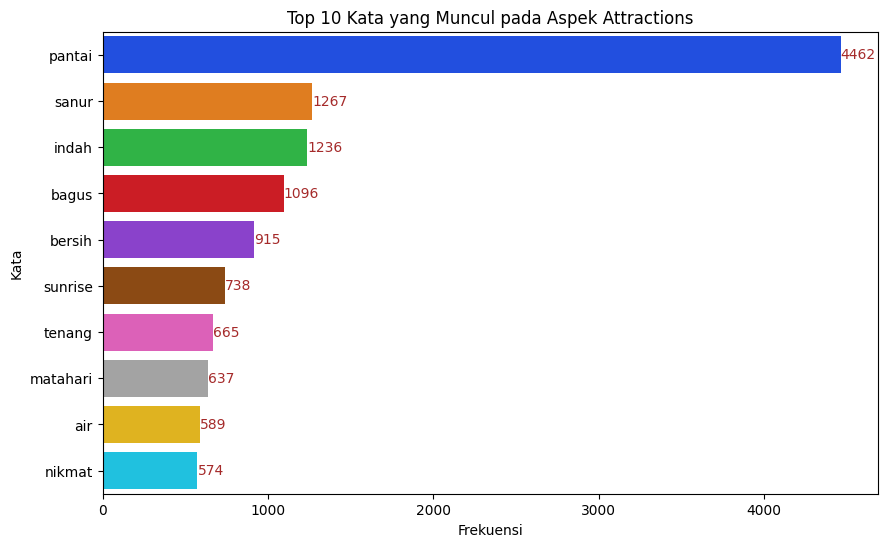

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_train['attractions_clean_text'] = df_train['attractions_clean_text'].fillna('')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['attractions_clean_text'])

# Shitung jumlah kata
word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.A.ravel()})

# urutkan data dan pilih top 10
word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = 10
top_word_count_df = word_count_df.head(top_words)

# buat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Word', data=top_word_count_df, palette='bright')
plt.title(f'Top {top_words} Kata yang Muncul pada Aspek Attractions')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

for index, value in enumerate(top_word_count_df['Count']):
    barplot.text(value + 0.1, index, str(value), color='brown', ha="left", va="center")

plt.show()

Beberapa Kata yang Sering Muncul pada Aspek Amenities

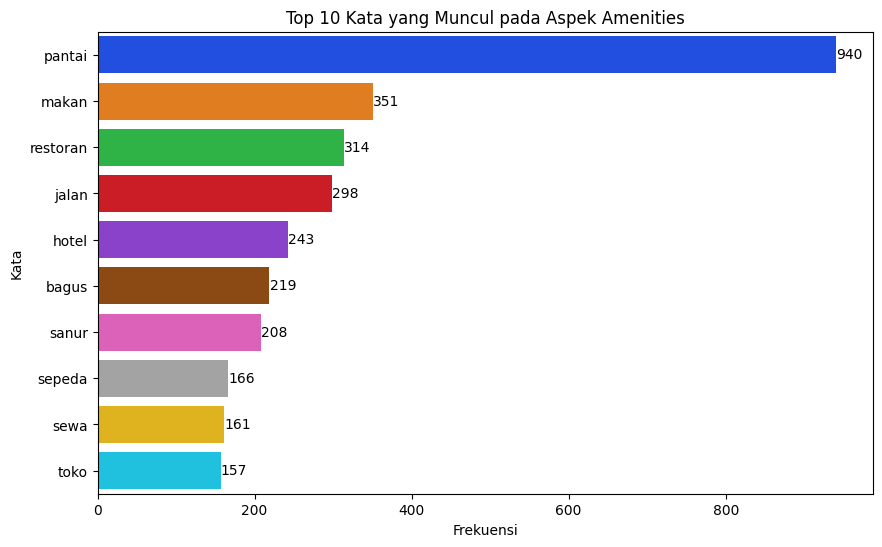

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_train['amenities_clean_text'] = df_train['amenities_clean_text'].fillna('')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['amenities_clean_text'])

# hitung total kata
word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.A.ravel()})
word_count_df = word_count_df[word_count_df['Word'] != 'none']

# urutkan dan pilih top 10
word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = 10
top_word_count_df = word_count_df.head(top_words)

# buat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Word', data=top_word_count_df, palette='bright')
plt.title(f'Top {top_words} Kata yang Muncul pada Aspek Amenities')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

for index, value in enumerate(top_word_count_df['Count']):
    barplot.text(value + 0.1, index, str(value), color='black', ha="left", va="center")

plt.show()

Beberapa Kata yang Sering Muncul pada Aspek Access

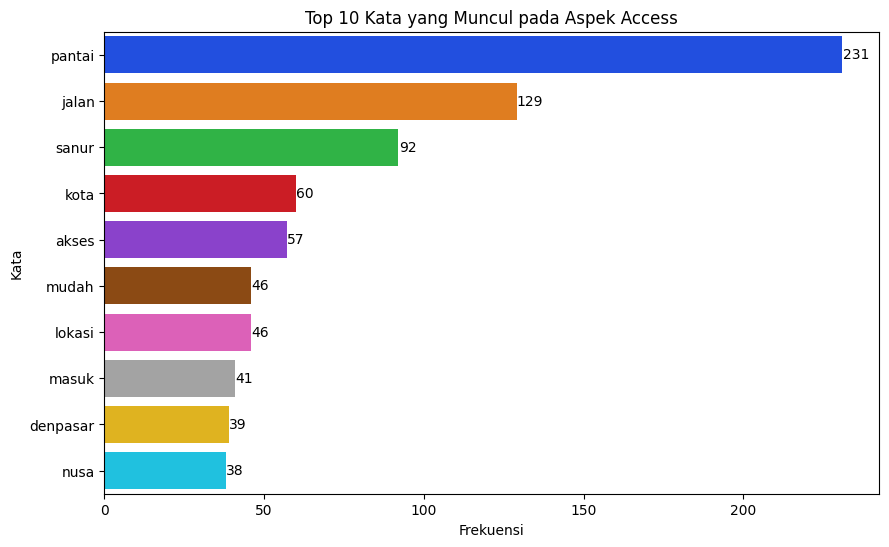

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_train['access_clean_text'] = df_train['access_clean_text'].fillna('')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['access_clean_text'])

# hitung jumlah kata
word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.A.ravel()})
word_count_df = word_count_df[word_count_df['Word'] != 'none']

# urutkan dan pilih top 10
word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = 10
top_word_count_df = word_count_df.head(top_words)

# buat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Word', data=top_word_count_df, palette='bright')
plt.title(f'Top {top_words} Kata yang Muncul pada Aspek Access')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

for index, value in enumerate(top_word_count_df['Count']):
    barplot.text(value + 0.1, index, str(value), color='black', ha="left", va="center")

plt.show()

Beberapa Kata yang Sering Muncul pada Aspek Price

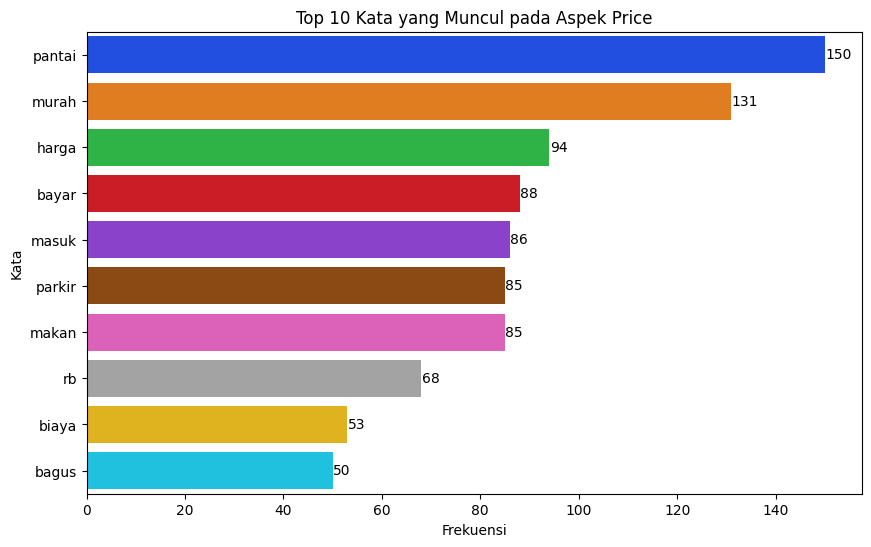

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_train['price_clean_text'] = df_train['price_clean_text'].fillna('')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['price_clean_text'])

# hitung total kata
word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.A.ravel()})
word_count_df = word_count_df[word_count_df['Word'] != 'none']

# urutkan dan pilih top 10
word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = 10
top_word_count_df = word_count_df.head(top_words)

# buat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Word', data=top_word_count_df, palette='bright')
plt.title(f'Top {top_words} Kata yang Muncul pada Aspek Price')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

for index, value in enumerate(top_word_count_df['Count']):
    barplot.text(value + 0.1, index, str(value), color='black', ha="left", va="center")

plt.show()

TOP K KATA YANG MUNCUL PADA ASPEK NO ASPECT

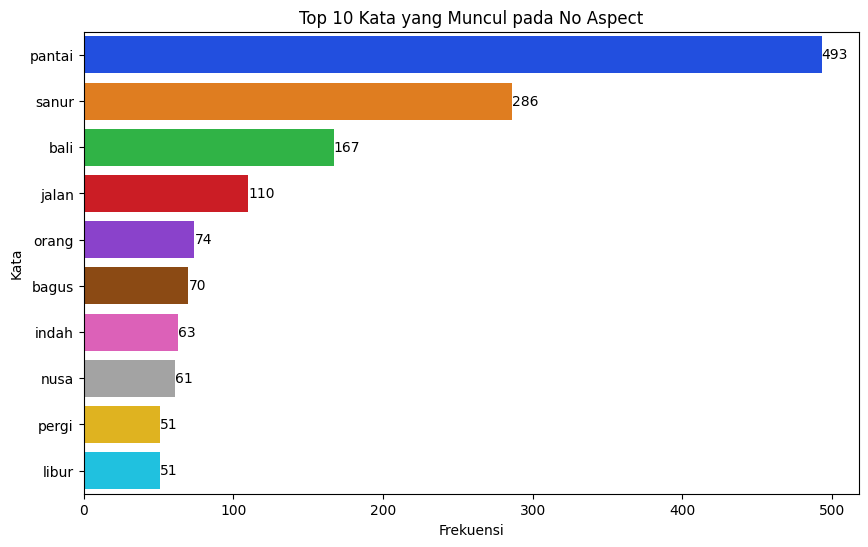

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_train['no_aspect_clean_text'] = df_train['no_aspect_clean_text'].fillna('')

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['no_aspect_clean_text'])

# jumlah total kata
word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
word_count_df = pd.DataFrame({'Word': feature_names, 'Count': word_counts.A.ravel()})
word_count_df = word_count_df[word_count_df['Word'] != 'none']

# urutkan dan pilih top 10
word_count_df = word_count_df.sort_values(by='Count', ascending=False)
top_words = 10
top_word_count_df = word_count_df.head(top_words)

# buat diagram batang
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Count', y='Word', data=top_word_count_df, palette='bright')
plt.title(f'Top {top_words} Kata yang Muncul pada No Aspect')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Annotate each bar with its count with some padding
for index, value in enumerate(top_word_count_df['Count']):
    barplot.text(value + 0.1, index, str(value), color='black', ha="left", va="center")

plt.show()

Wordcloud Keseluruhan Review

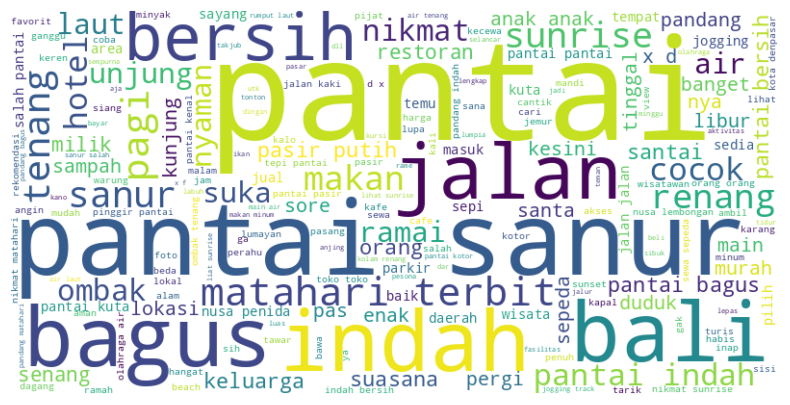

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan 'review_clean' adalah nama kolom yang berisi teks yang ingin Anda analisis
text_column = df_train['review_clean'].dropna()  # Menghilangkan nilai-nilai NaN jika ada
text = ' '.join(text_column)

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud Aspek Attraction

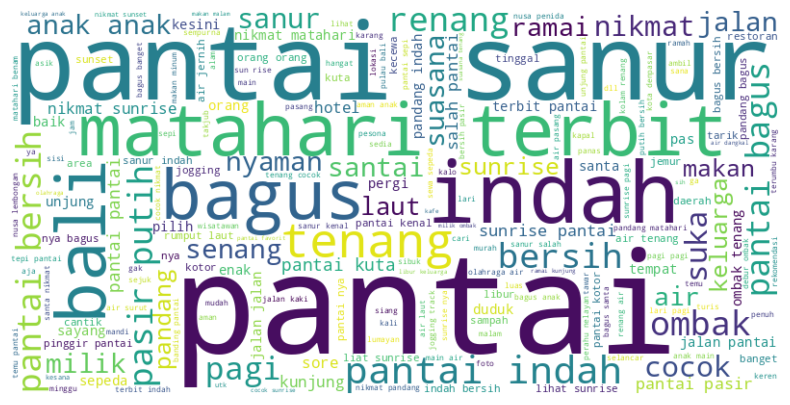

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df_train['attractions_clean_text'].dropna()  # Menghilangkan nilai-nilai NaN jika ada

# Menggabungkan teks dan menghapus kata 'none'
text = ' '.join([word for word in text_column if word.lower() != 'none'])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud Aspek Amenities

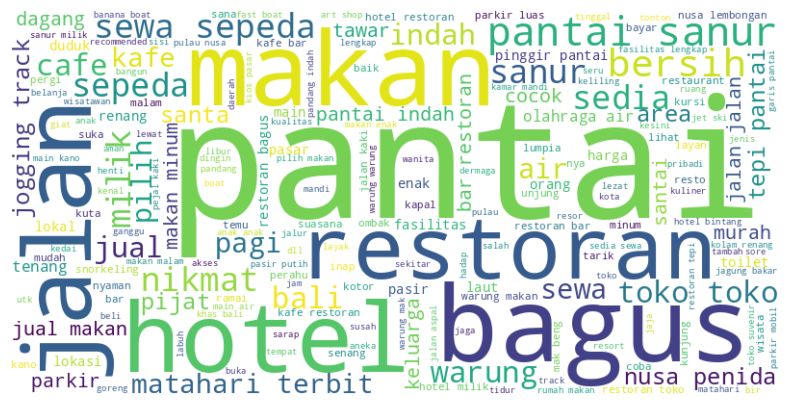

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df_train['amenities_clean_text'].dropna()  # Menghilangkan nilai-nilai NaN jika ada

# Menggabungkan teks dan menghapus kata 'none'
text = ' '.join([word for word in text_column if word.lower() != 'none'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud Aspek Access

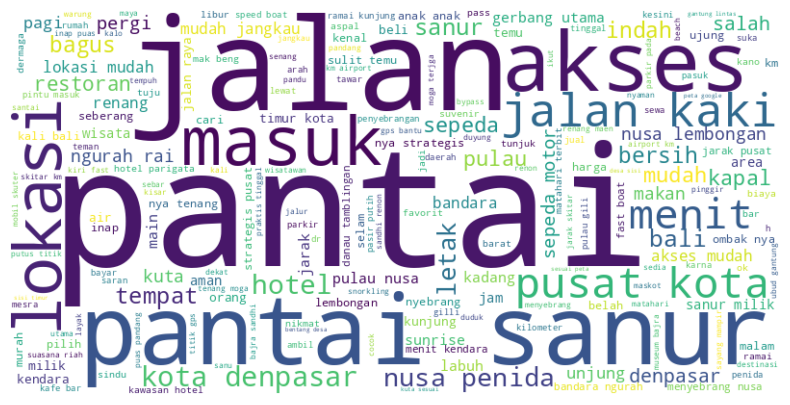

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df_train['access_clean_text'].dropna()  # Menghilangkan nilai-nilai NaN jika ada

# Menggabungkan teks dan menghapus kata 'none'
text = ' '.join([word for word in text_column if word.lower() != 'none'])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud Aspek Price

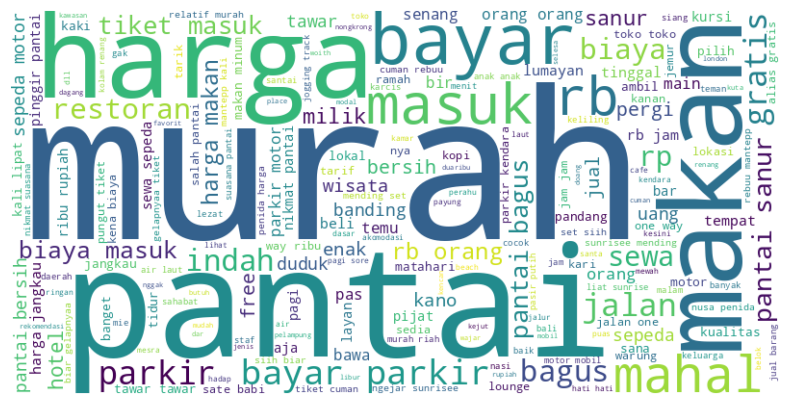

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df_train['price_clean_text'].dropna()  # Menghilangkan nilai-nilai NaN jika ada

# Menggabungkan teks dan menghapus kata 'none'
text = ' '.join([word for word in text_column if word.lower() != 'none'])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud No Aspect

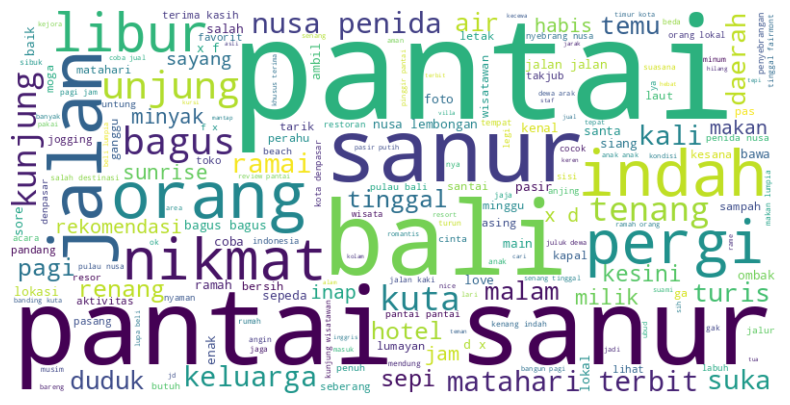

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df_train['no_aspect_clean_text'].dropna()  # Menghilangkan nilai-nilai NaN jika ada

# Menggabungkan teks dan menghapus kata 'none'
text = ' '.join([word for word in text_column if word.lower() != 'none'])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()